In [2]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.2, font="Times New Roman", style="whitegrid")

In [3]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [4]:
csv_path = ['cm_767', 'cm_900', 'cm_998']
angular_sizes = [4e-5, 6e-5, 9e-4]
acc = [0.767, 0.900, 0.998]

In [5]:
df = pd.read_csv('csv/cm_767.csv', index_col=0)
df

,0,1,2,3
0,892,156,39,10
1,269,709,131,5
2,40,119,1673,291
3,6,6,187,871


In [6]:
Tems = ['1905K', '2056K', '2692K', '3467K']

C:\Users\FYQ\AppData\Local\Temp\ipykernel_26552\3888700874.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


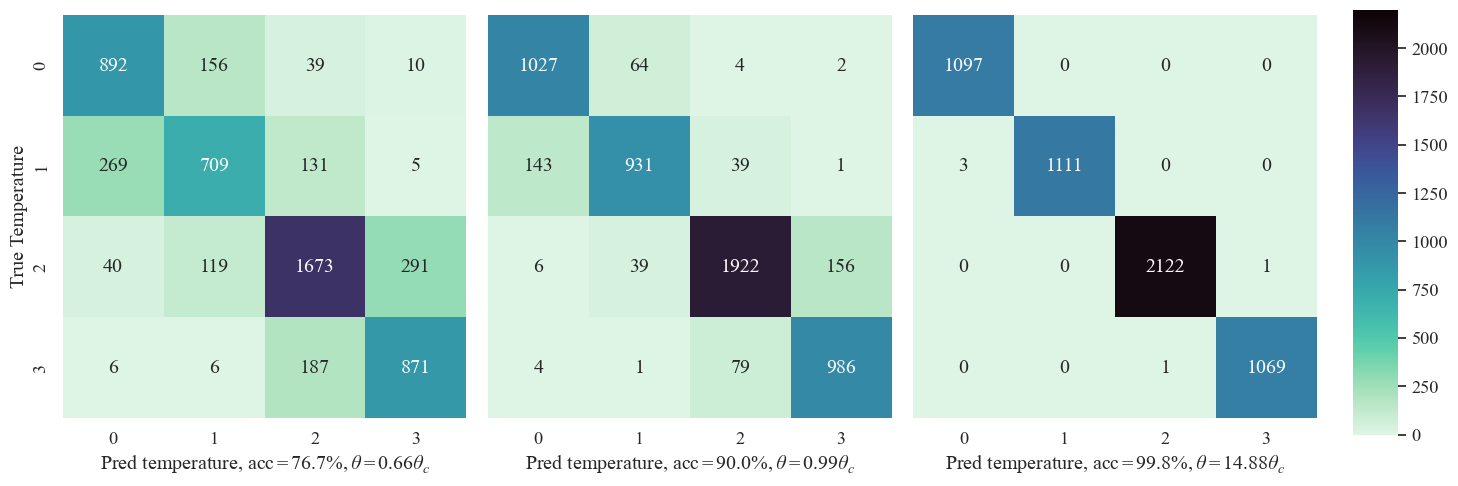

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
cbar_ax = fig.add_axes([.91, .1, .03, .85])
palette = sns.color_palette('mako_r', as_cmap=True)
for index, csv_file in enumerate(csv_path):
    ax = axes[index]
    ax.set_aspect('equal')
    df_conf = pd.read_csv(f'csv/{csv_file}.csv', index_col=0)
    cm = df_conf.to_numpy()
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Tems)
    # disp.plot(cmap='Reds', ax=ax, colorbar=index==2)
    sns.heatmap(cm, ax=ax, annot=True, cmap=palette, fmt="n", cbar=index==0, 
                cbar_ax=None if index else cbar_ax, vmin=0, vmax=2200)
    ax.set_xlabel(rf'Pred temperature, acc$={acc[index]*100:.1f}\%,\theta={angular_sizes[index]*64/3.87e-3:.2f}\theta_c$')
    if index == 0:
        ax.set_ylabel('True Temperature')
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig(f'images/confusion3.png', dpi=600)
plt.savefig(f'images/confusion3.pdf')